In [ ]:

from google.colab import drive
drive.mount('/content/drive')

!unzip /content/drive/MyDrive/datos_procesados.zip -d /content

Streaming output truncated to the last 5000 lines.
 extracting: /content/images/00021968_001.png  
 extracting: /content/images/00016486_011.png  
 extracting: /content/images/00029813_037.png  
 extracting: /content/images/00002437_003_aug_174.png  
 extracting: /content/images/00028300_007.png  
 extracting: /content/images/00022106_006.png  
 extracting: /content/images/00010475_050.png  
 extracting: /content/images/00000034_000.png  
 extracting: /content/images/00029655_000.png  
 extracting: /content/images/00016420_000.png  
 extracting: /content/images/00000398_003.png  
 extracting: /content/images/00028702_000.png  
 extracting: /content/images/00028674_000.png  
 extracting: /content/images/00003292_007.png  
 extracting: /content/images/00014751_001.png  
 extracting: /content/images/00007932_005.png  
 extracting: /content/images/00023794_000.png  
 extracting: /content/images/00014370_000.png  
 extracting: /content/images/00004468_001.png  
 extracting: /content/images/

In [ ]:
# Import necessary packages
import keras
from keras import backend as K
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import cv2
import sklearn
import shap
import os
import seaborn as sns
import time
import pickle


In [ ]:
train_df = pd.read_csv('/content/train_df.csv')
val_df = pd.read_csv('/content/val_df.csv')
test_df = pd.read_csv('/content/test_df.csv')
print(f"Train shape: {train_df.shape}")
print(f"Validation shape: {val_df.shape}")
print(f"Test shape: {test_df.shape}")


Train shape: (58045, 16)
Validation shape: (17063, 16)
Test shape: (16491, 16)


Class Distribution per Dataset:
                    Train  Validation  Test
Atelectasis          2250        1692  1677
Cardiomegaly         1075         446   439
Consolidation        1170         709   730
Edema                1023         299   374
Effusion             1932        1987  1892
Emphysema            1261         396   454
Fibrosis             1326         259   271
Hernia               1389          42    27
Infiltration         1772        3094  2932
Mass                 2137         795   727
Nodule               1534         954   945
Pleural_Thickening   1349         522   484
Pneumonia             930         222   214
Pneumothorax         1470         807   725


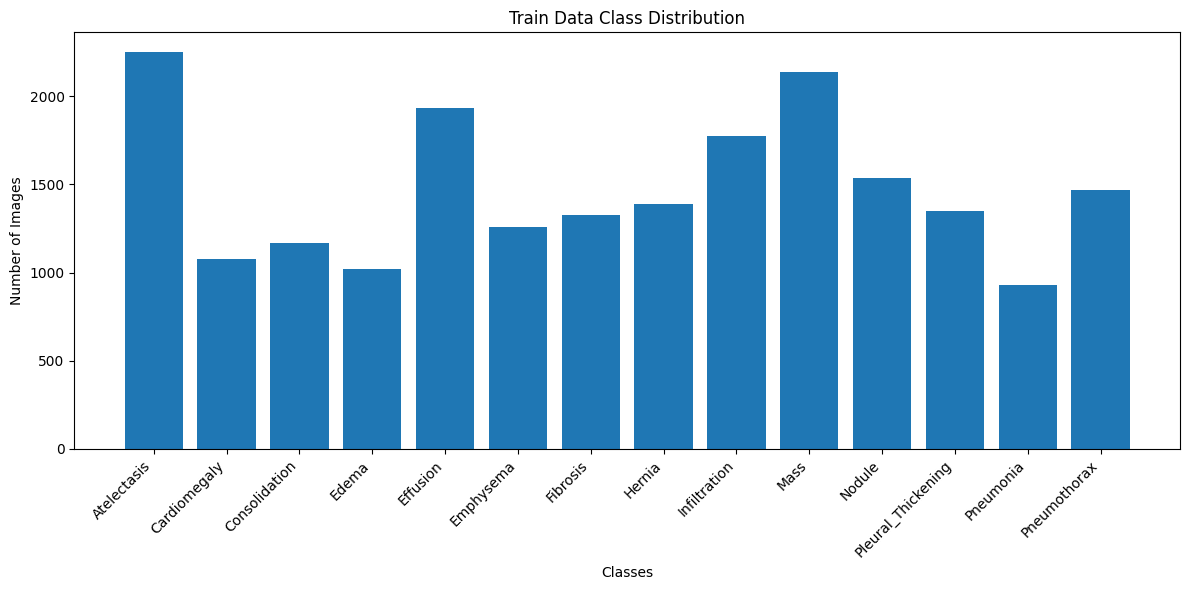

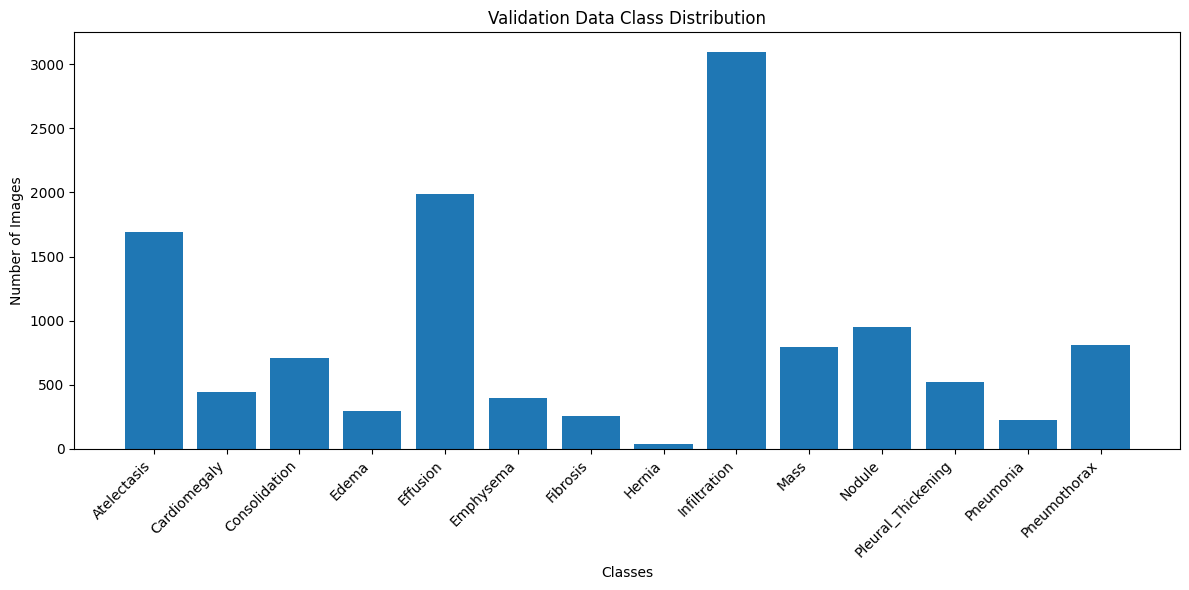

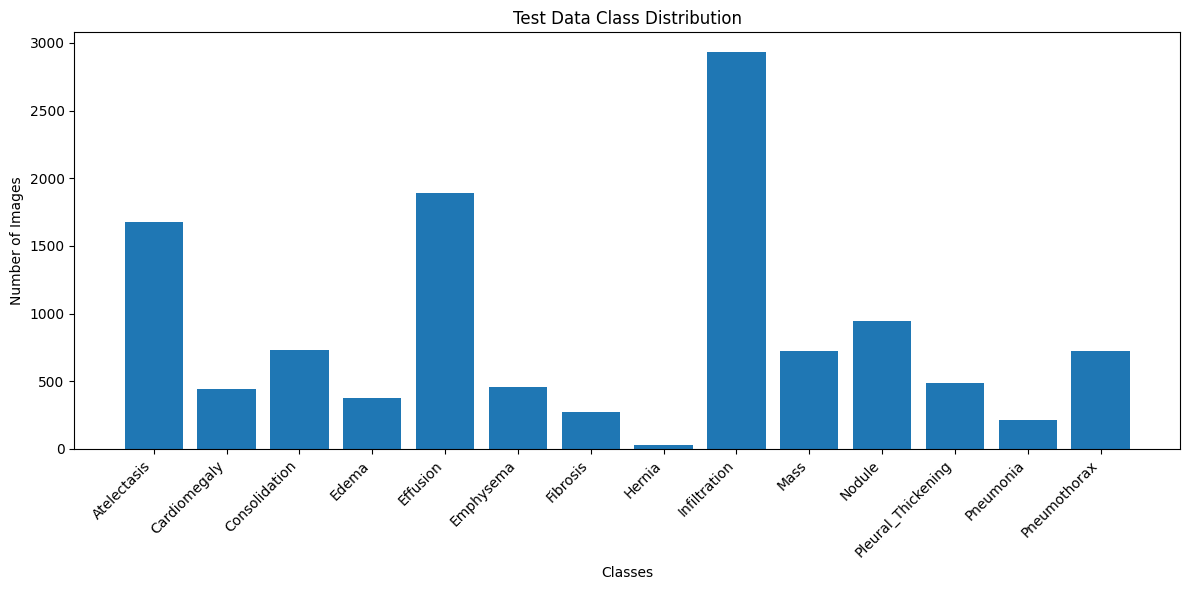

In [ ]:
def count_classes(df, classes):
  class_counts = {}
  for c in classes:
    class_counts[c] = df[c].sum()
  return class_counts

classes = [col for col in train_df.columns if col not in ['Image_file', 'Patient ID']]
# Count classes in each dataset
train_counts = count_classes(train_df, classes)
val_counts = count_classes(val_df, classes)
test_counts = count_classes(test_df, classes)

# Create a summary dataframe
summary_data = {
    'Train': list(train_counts.values()),
    'Validation': list(val_counts.values()),
    'Test': list(test_counts.values())
}
summary_df = pd.DataFrame(summary_data, index=classes)

# Print the summary table
print("Class Distribution per Dataset:")
print(summary_df)

# Plotting function
def plot_class_distribution(counts, title):
    plt.figure(figsize=(12, 6))
    plt.bar(counts.keys(), counts.values())
    plt.title(title)
    plt.xlabel('Classes')
    plt.ylabel('Number of Images')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Plotting the distributions
plot_class_distribution(train_counts, 'Train Data Class Distribution')
plot_class_distribution(val_counts, 'Validation Data Class Distribution')
plot_class_distribution(test_counts, 'Test Data Class Distribution')

In [ ]:
train_df.head()

,Image_file,Patient ID,Atelectasis,Cardiomegaly,Consolidation,Edema,Effusion,Emphysema,Fibrosis,Hernia,Infiltration,Mass,Nodule,Pleural_Thickening,Pneumonia,Pneumothorax
0,00000001_000.png,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,00000001_001.png,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,00000002_000.png,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,00000003_000.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,00000003_001.png,3,0,0,0,0,0,0,0,1,0,0,0,0,0,0


### Visualización de las imágenes
Usando los nombres de las imágenes que figuran en el archivo csv, se recuperan la imagen asociada con cada fila de datos

Imagenes random


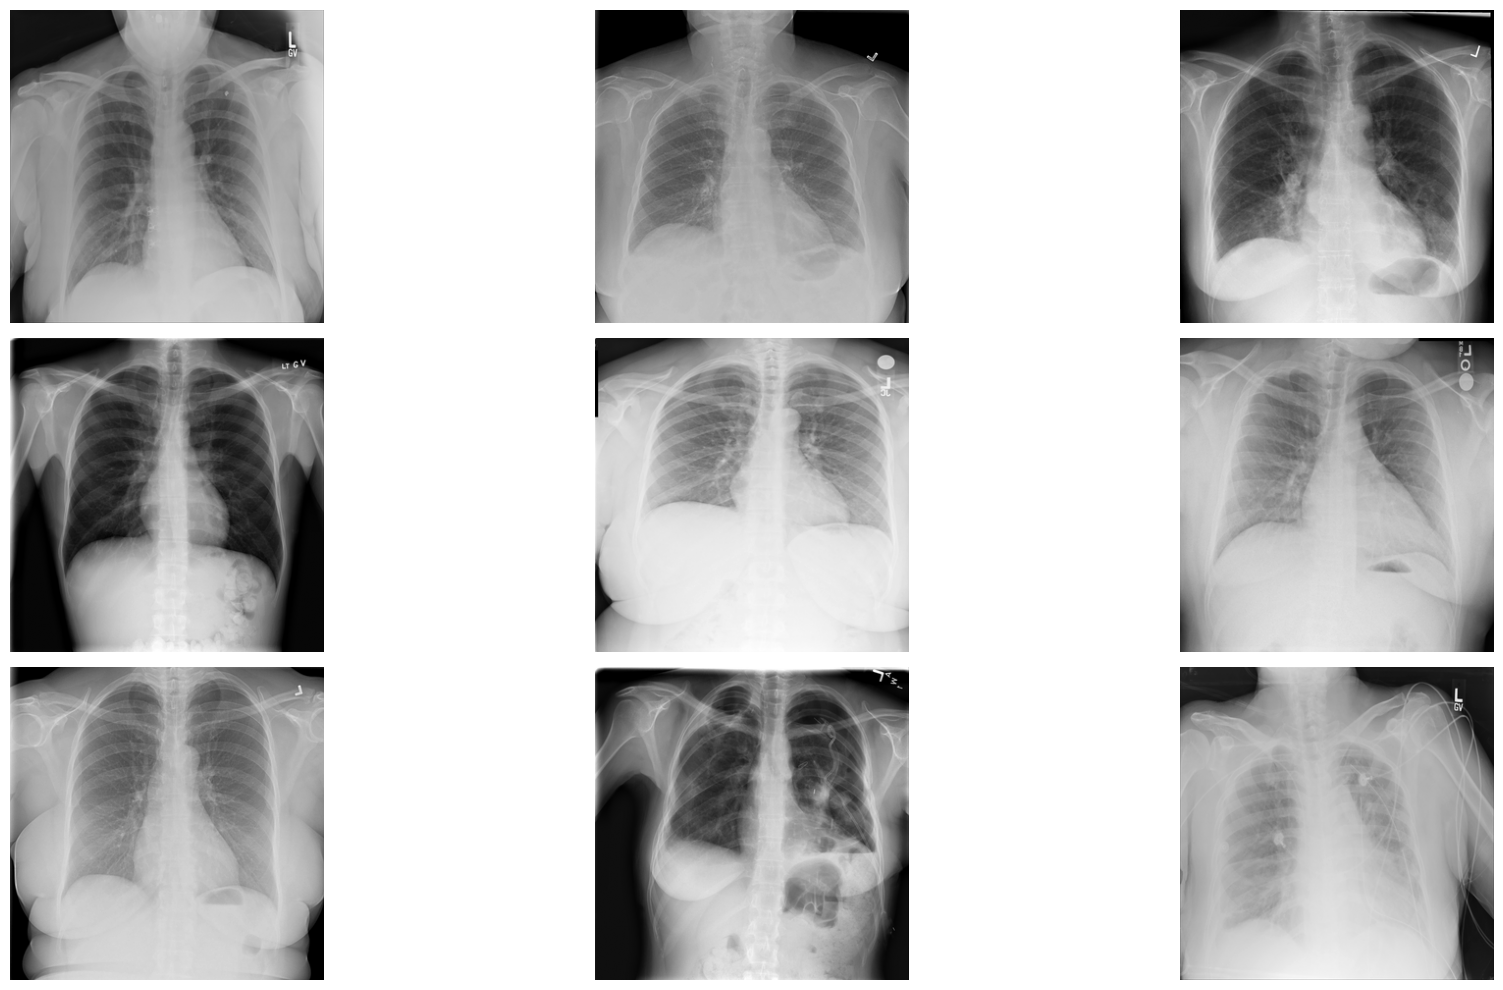

In [ ]:
# Extract numpy values from Image column in data frame
images = train_df['Image_file'].values

# Extract 9 random images from it
random_images = [np.random.choice(images) for i in range(9)]

# Location of the image dir
img_dir = 'images'

print('Imagenes random')

# Adjust the size of your images
plt.figure(figsize=(20,10))

# Iterate and plot random images
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = plt.imread(os.path.join(img_dir, random_images[i]))
    plt.imshow(img, cmap='gray')
    plt.axis('off')

# Adjust subplot parameters to give specified padding
plt.tight_layout()